In [1]:
import json

In [90]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [154]:
def mean_std_plot(ax, values, name, mk, c, legend, mode='train', metric='acc', noise_value=0.01):
    mean_values = np.mean(values, axis=0).squeeze()
    std_values = np.std(values, axis=0).squeeze()

    fine_x = np.arange(len(mean_values))#np.linspace(0, len(mean_values), 500)
    fine_y = mean_values
    selected_ids = fine_x[:len(fine_x)//4].tolist() + fine_x[(-3*len(fine_x)//4)::4].tolist() + [fine_x[-1]]

    fine_x = fine_x[selected_ids]
    fine_y = fine_y[selected_ids]

    mean_values = mean_values[selected_ids]
    std_values = std_values[selected_ids]
    #fine_y = np.interp(fine_x, , mean_values)

    # Add noise to the interpolated y-values
    
    # Plot noisy line with the same color as the points

    leg = ax.plot(
    fine_x,
    fine_y,
    marker=mk, 
    #label=legend,
    markersize=8, 
    linewidth=5, 
    color=c, 
    linestyle='--',
    alpha=1.
    )

    ax.fill_between(
    fine_x,
    fine_y - noise_value * std_values,
    fine_y + noise_value * std_values,
    alpha=0.2,
    color=c
    )
    
    ax.set_title(name, fontsize=40, fontweight="bold", fontname="serif")
    ax.set_xlabel('$Epochs$', fontsize=40)
    y_label = "Accuracy" if metric == 'acc' else "Loss"
    ax.set_ylabel('$'+y_label+'$', fontsize=40)
    ax.tick_params(axis='both', which='major', labelsize=40)
    return leg

In [164]:
def plot_curves(plot_data, datasets, metric='acc', mode='train', noise_value=1.2):
    Markers = ['s', 'x', 'o', 'D']
    Colors = ['tab:green',  'tab:orange', 'tab:purple', 'tab:blue']
    models = list(plot_data[0]["train"].keys())
    fig, axs = plt.subplots(1, 4, figsize=(35,10), sharey=True, constrained_layout=True)
    legends = (f'${models[0]}$', f'${models[1]}$', f'${models[2]}$', f'${models[3]}$')
    #(ax, values, name, mk, c, mode='acc', noise_value=0.01)
    #legs = []
    j = 0
    for ax, name, data in zip(axs.flat, datasets, plot_data):
        for i, key in enumerate(data[f'{mode}']):
            crv_data = data[f'{mode}'][key][metric]
            mk = Markers[i]
            c = Colors[i]
            mean_std_plot(ax, values=crv_data, name=name, mk=mk, c=c, metric=metric, mode=mode, legend=legends[i], noise_value=noise_value)
            #i += 1
        #ax.legend()
    legs = [mlines.Line2D([], [], color='tab:green', marker='s', linestyle='--', markersize=19, label=legends[0]),
            mlines.Line2D([], [], color='tab:orange', marker='X', linestyle='--', markersize=19, label=legends[1]),
            mlines.Line2D([], [], color='tab:purple', marker='o', linestyle='--', markersize=19, label=legends[2]),
            mlines.Line2D([], [], color='tab:blue', marker='D', linestyle='--', markersize=19, label=legends[3])]
    leg = fig.legend(handles=legs, loc='upper center', prop={'size': 40, 'family':'serif'}, bbox_to_anchor=(0.52, -0.05), fancybox=True, shadow=True, ncol=4)
    
    for line in leg.get_lines():
        line.set_linewidth(4.0)
    for ax in fig.get_axes():
        ax.label_outer()
    fig.savefig(f'{mode}-{metric}-clip.pdf', bbox_inches='tight')
    fig.show()

In [142]:
plot_data = []
for i, kb in enumerate(['carcinogenesis', 'mutagenesis', 'semantic_bible', 'vicodi']):
    with open(f'Datasets/{kb}/Plot_data/plot_data_kf.json') as file:
        data = json.load(file)
        plot_data.append(data)

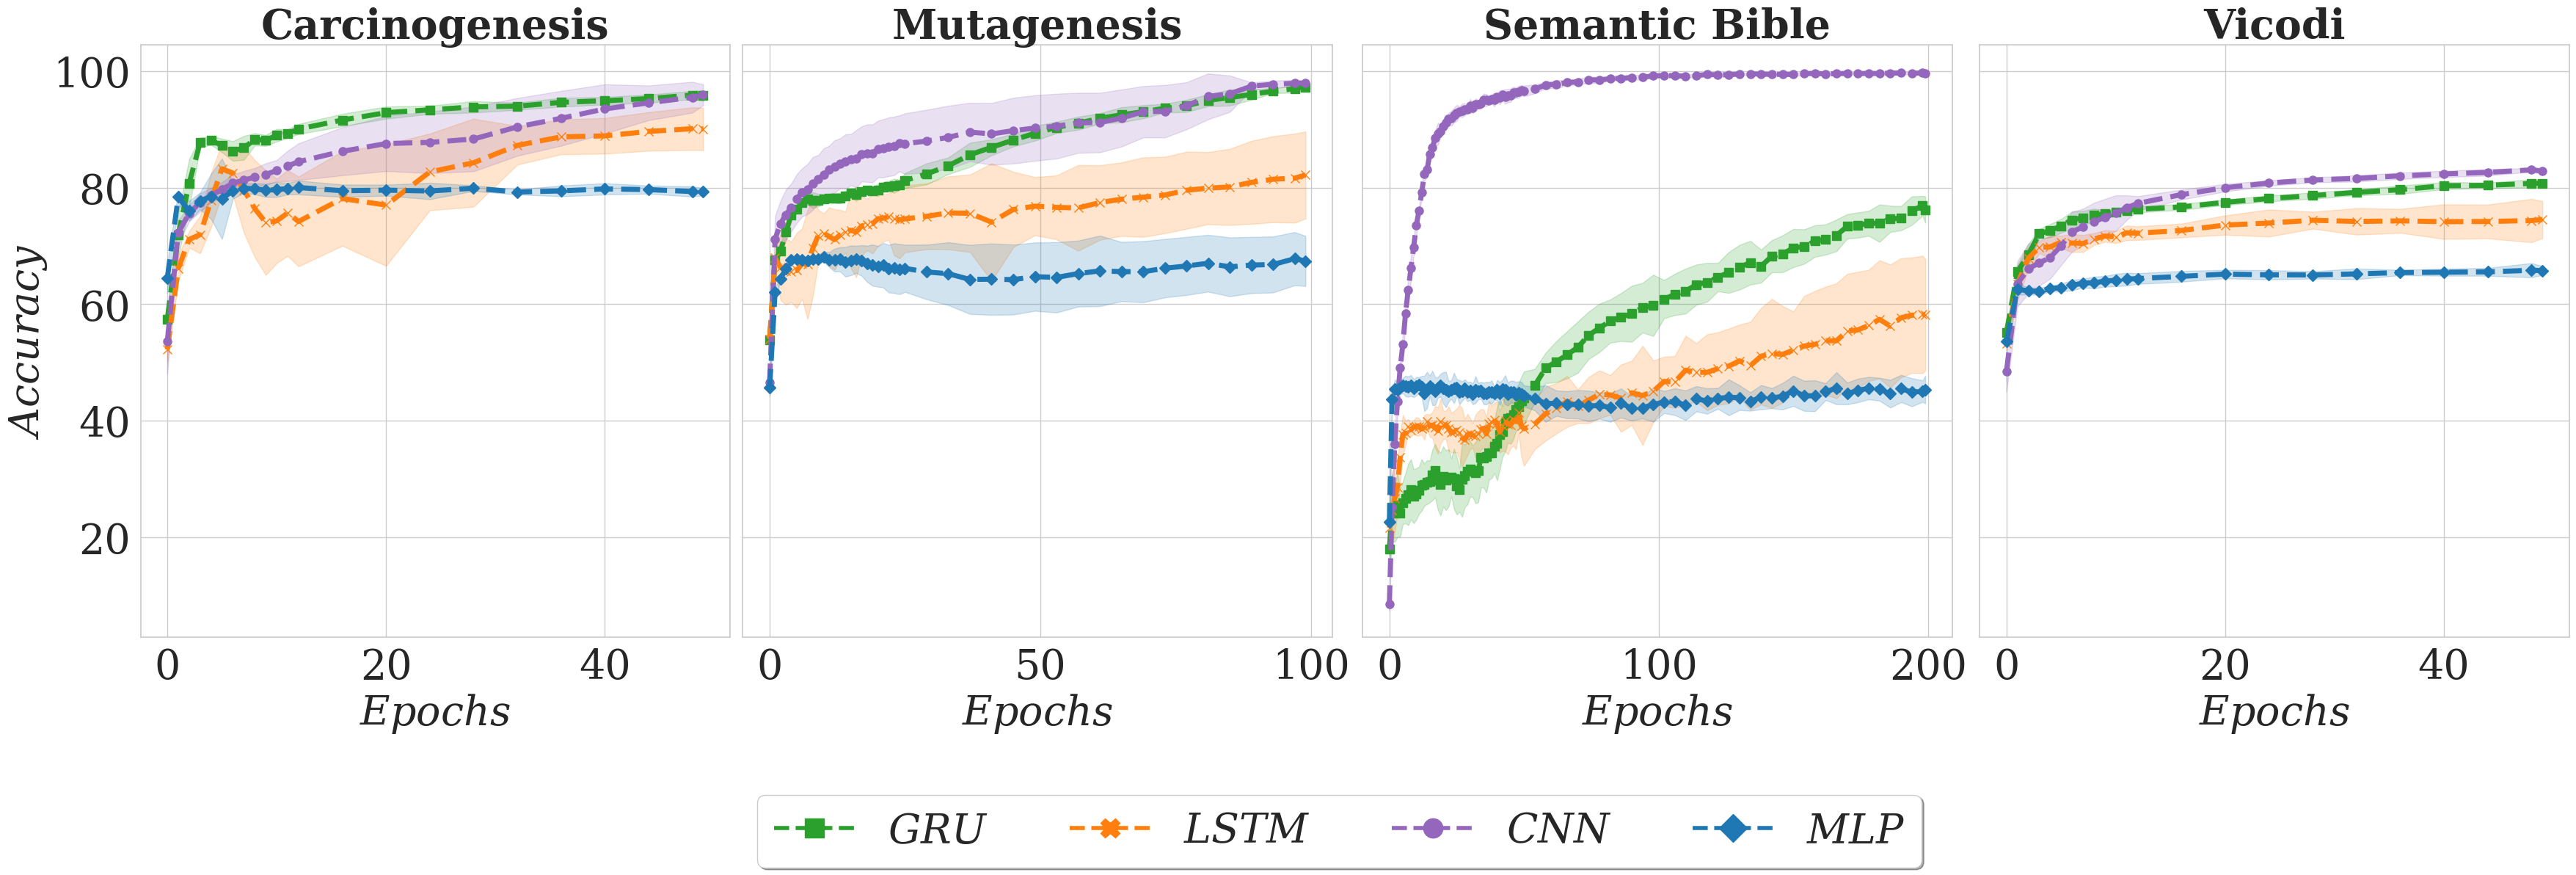

In [165]:
datasets = ['Carcinogenesis', 'Mutagenesis', 'Semantic Bible', 'Vicodi']
plot_curves(plot_data, datasets, mode='train', metric='acc')

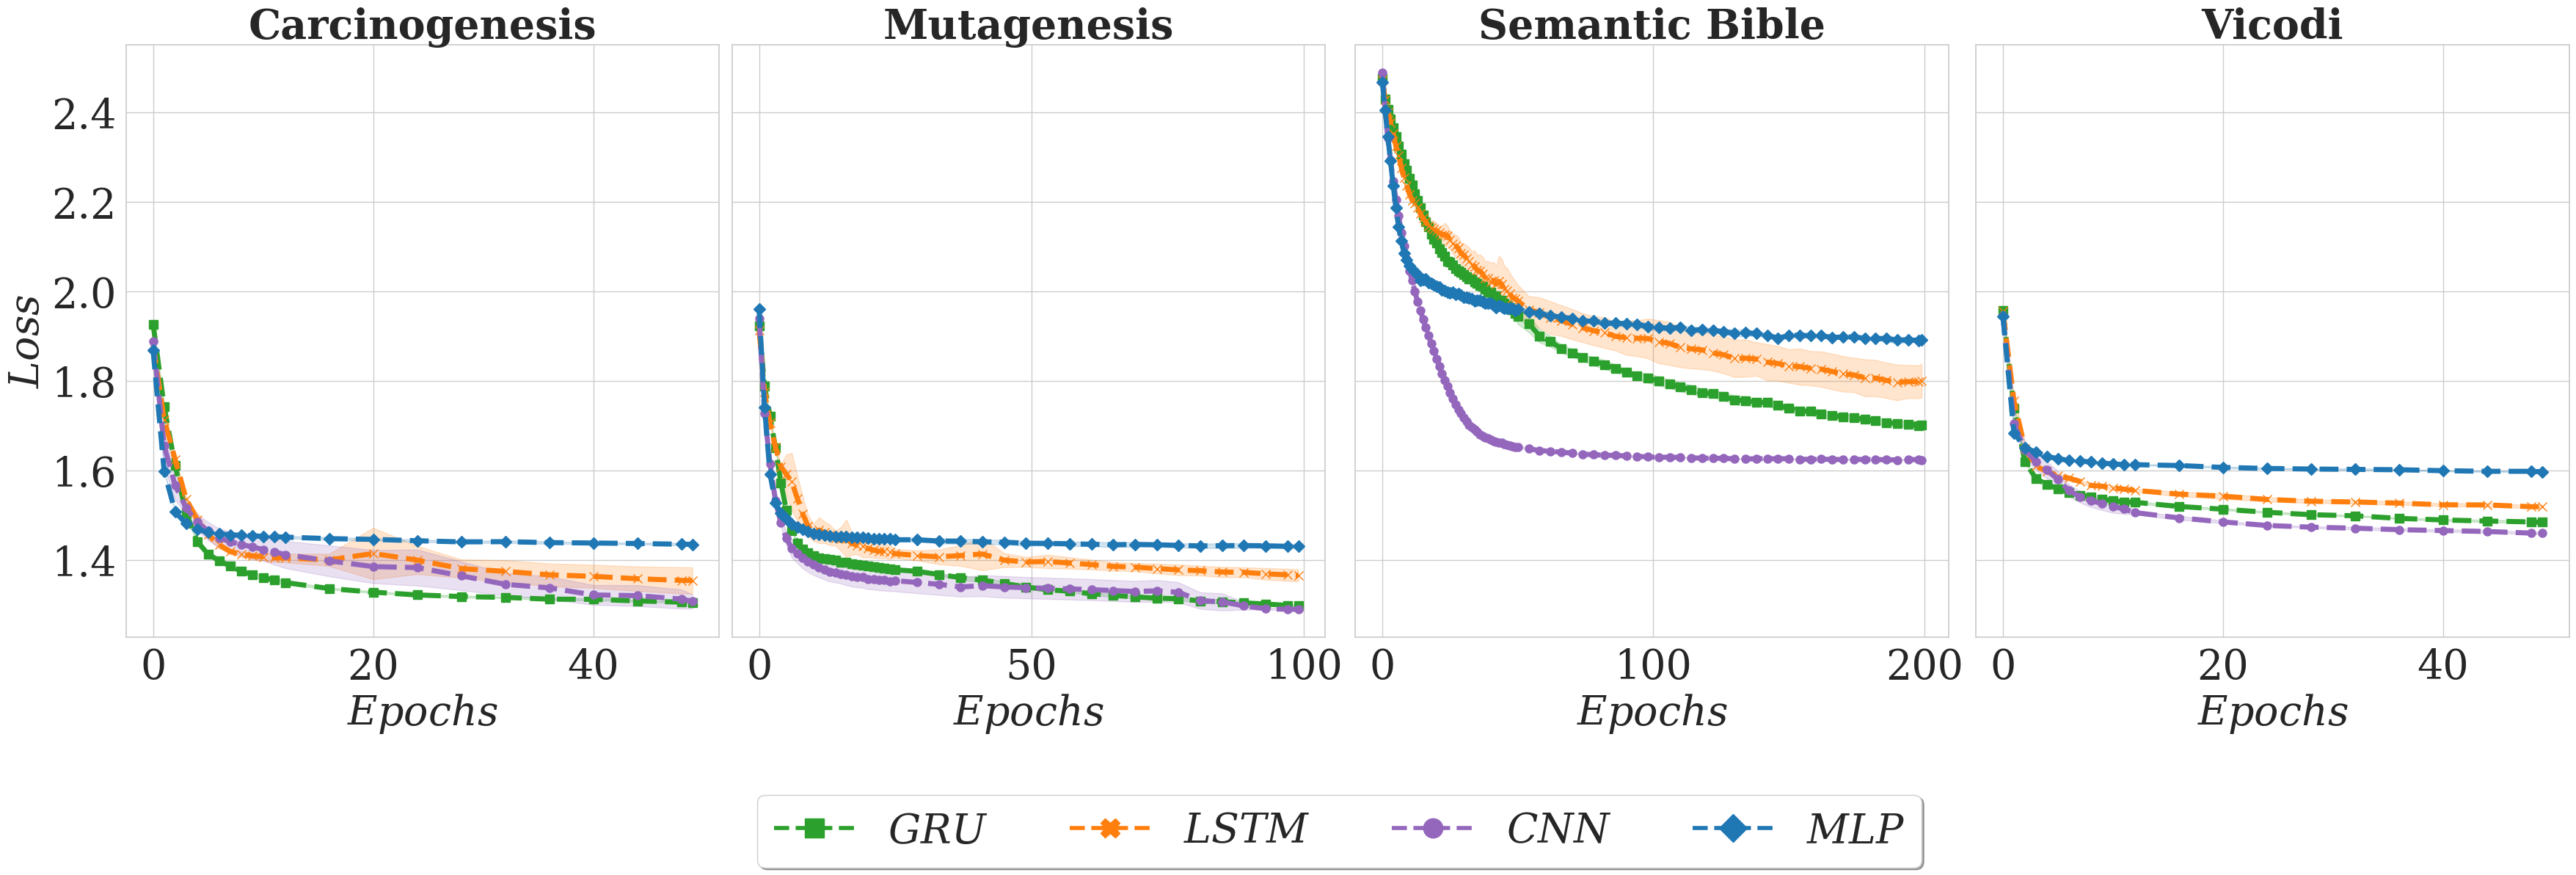

In [166]:
plot_curves(plot_data, datasets, mode='train', metric='loss', noise_value=0.8)

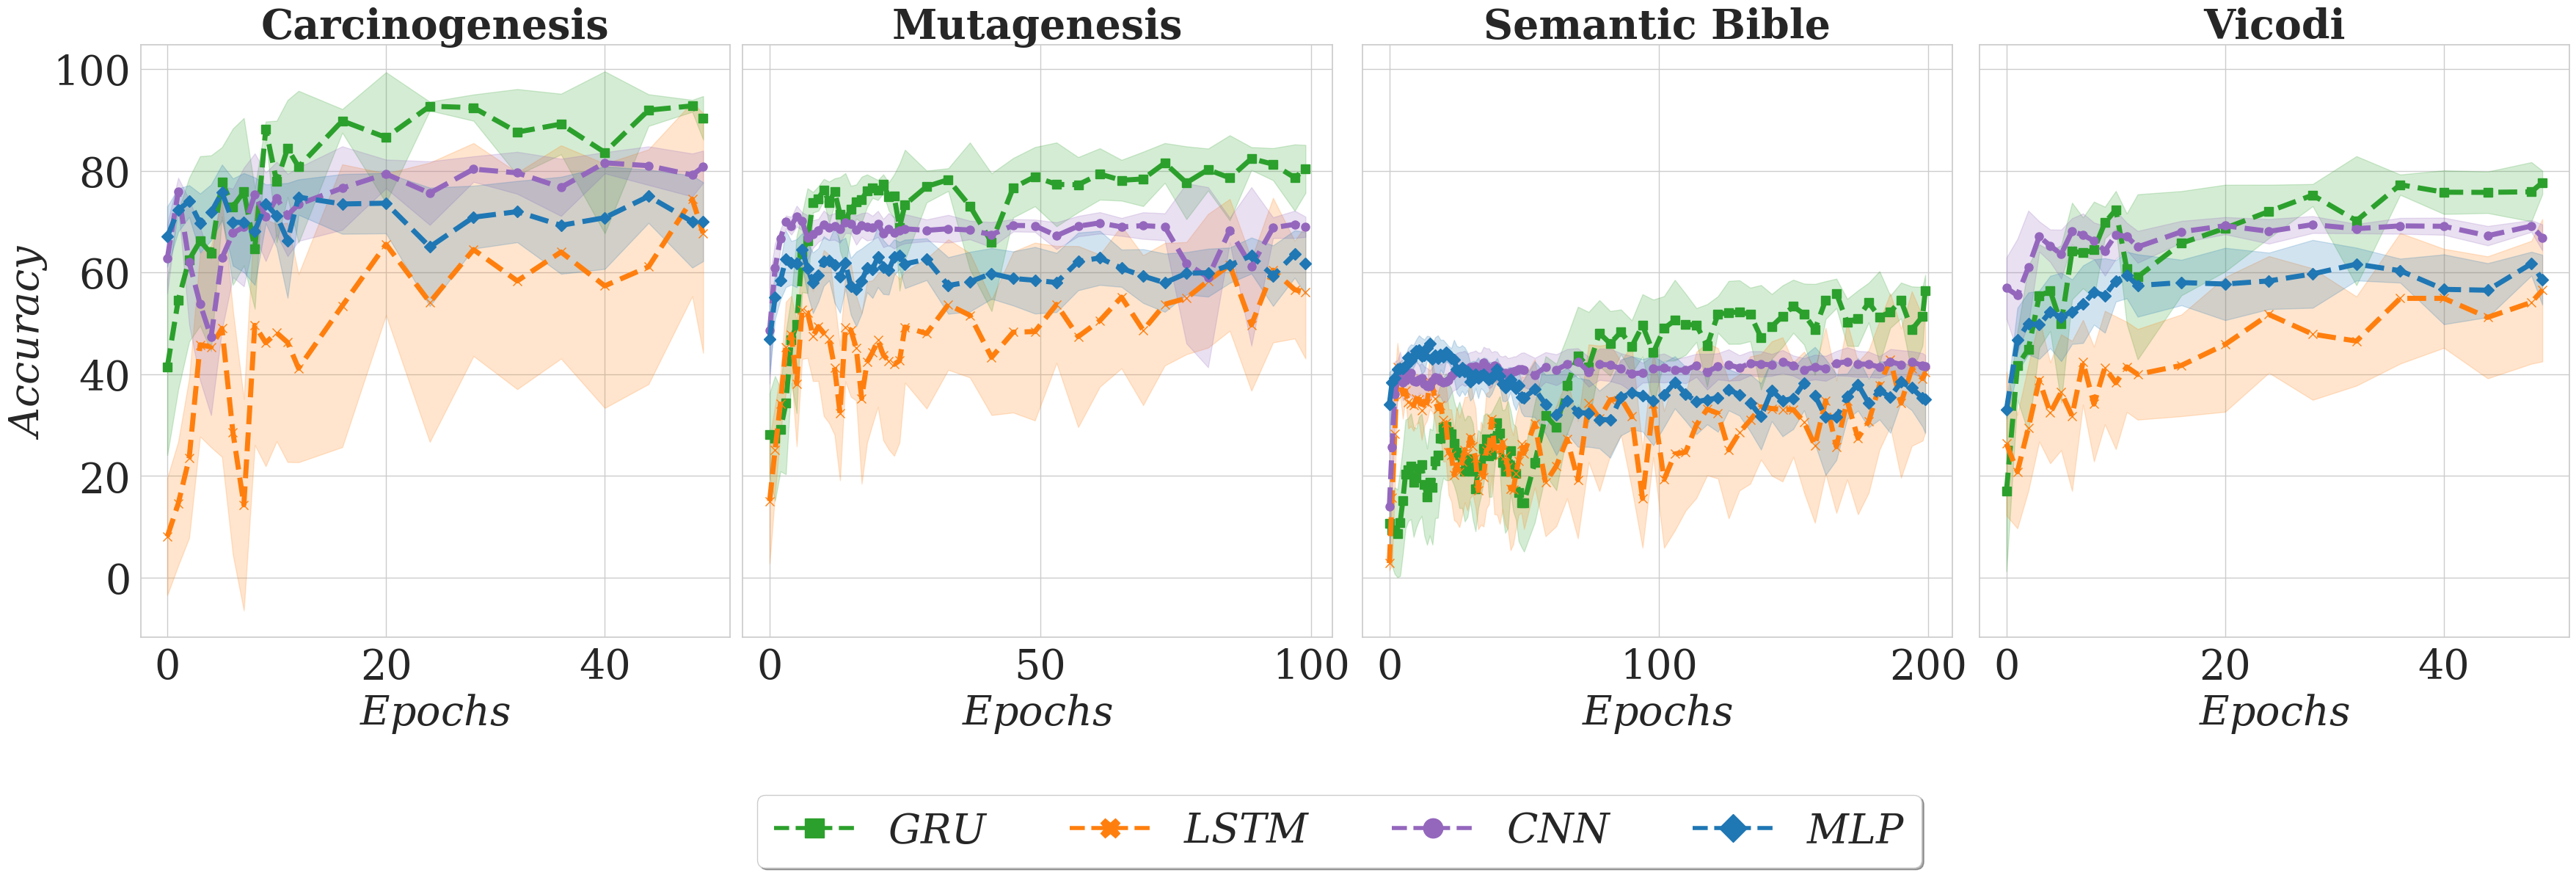

In [167]:
plot_curves(plot_data, datasets, mode='val', metric='acc', noise_value=0.8)

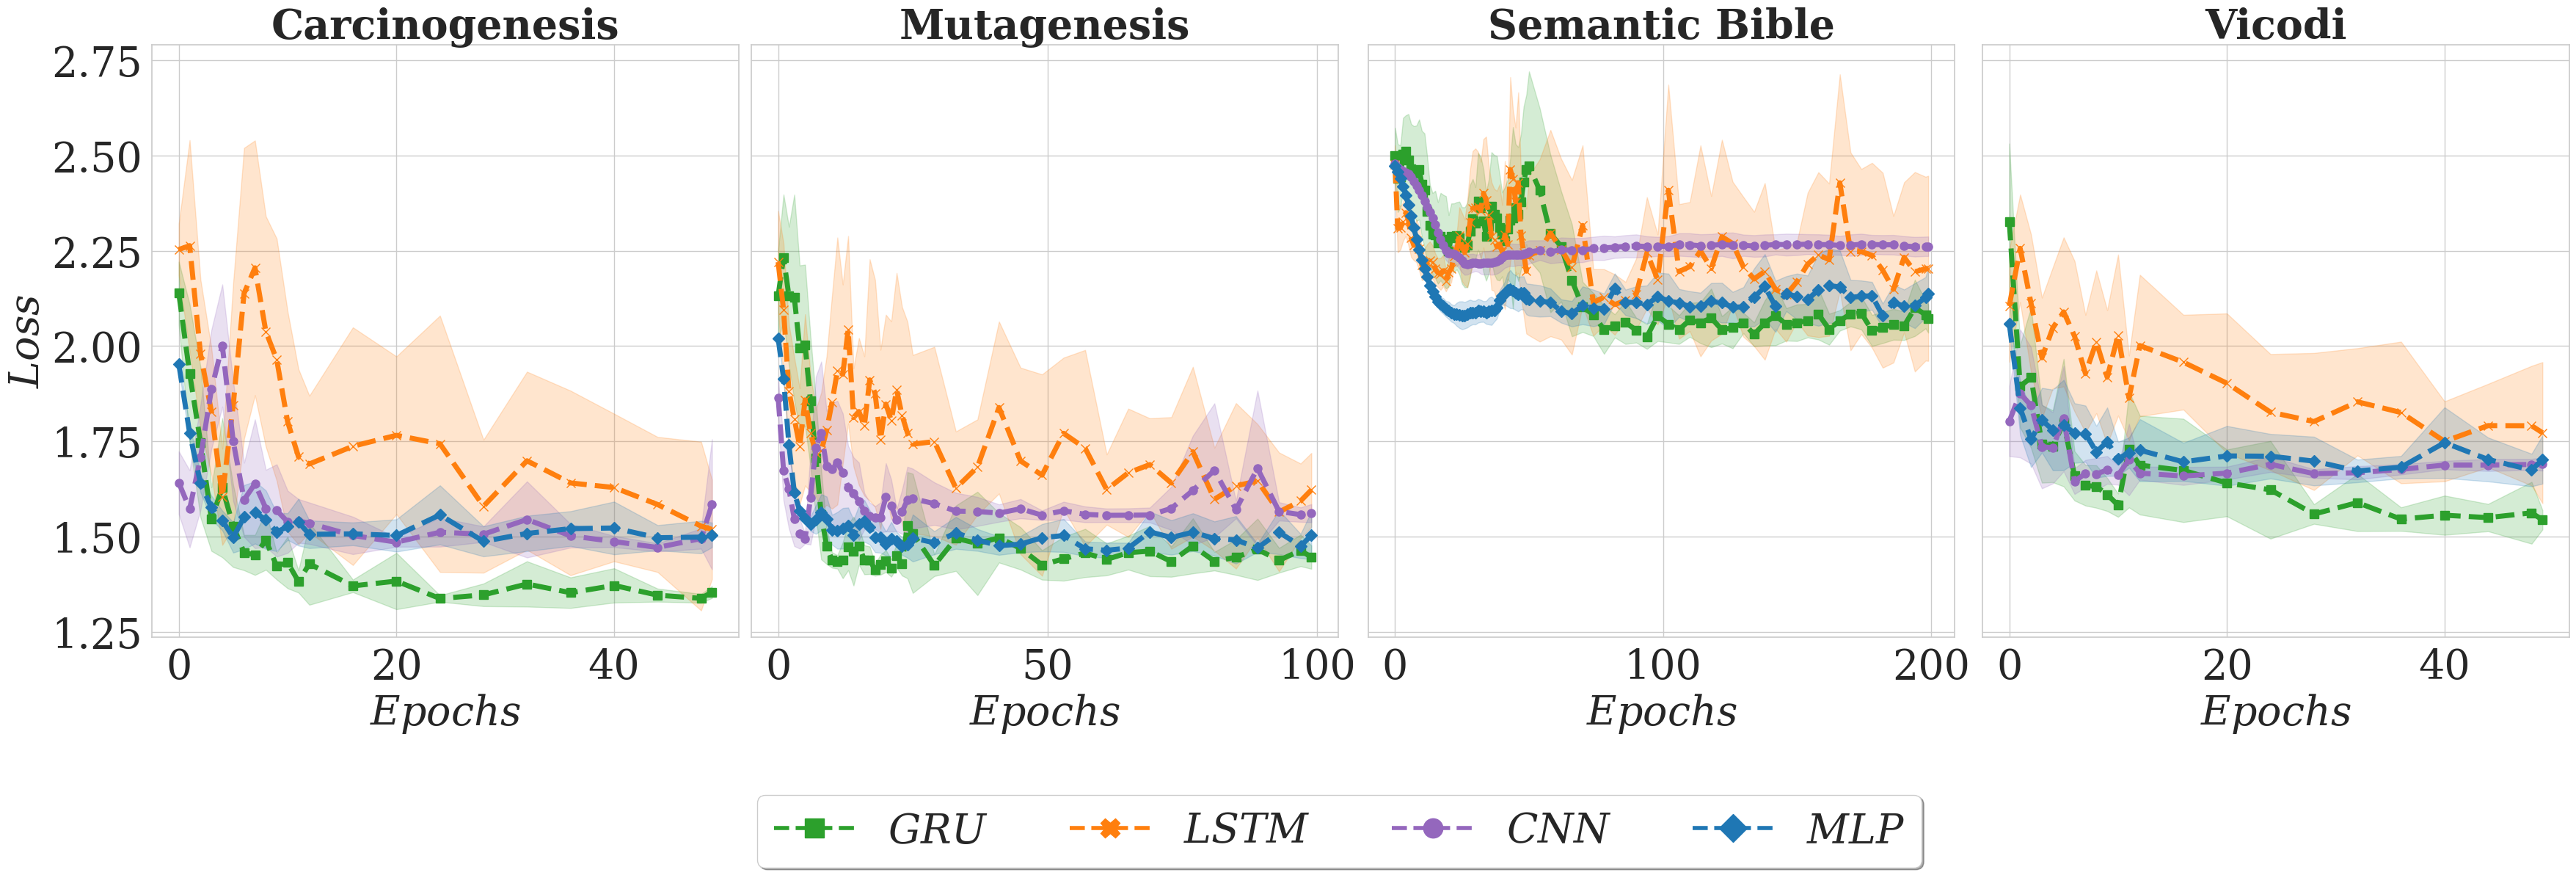

In [168]:
plot_curves(plot_data, datasets, mode='val', metric='loss', noise_value=0.8)